In [1]:
#### Versión del 4/4/2022 #####
import pytearcat as pt
import sympy as sy
from sympy import * 

# All Geodesic Motion


In [2]:
t,r,theta,phi = pt.coords('t,r,theta,phi')

X = pt.con('X')

A = pt.fun('A','r,theta')
B = pt.fun('B','r,theta')
C = pt.fun('C','r,theta')
D = pt.fun('D','r,theta')
E = pt.fun('E','r,theta')
Phi= pt.fun('Phi','r,theta')
omega = pt.fun('omega','r,theta')

Remember that the time coordinate must be the first coordinate.


In [3]:
ds = 'ds2 = -A**2*dt**2 + B**2*dr**2 + C**2*dtheta**2 + D**2*dphi**2 + 2*omega*dt*dphi'
g = pt.metric(ds)


Dimension = 4
Coordinates = t,r,theta,phi
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[-A(r, theta)**2,              0,              0, omega(r, theta)],
[              0, B(r, theta)**2,              0,               0],
[              0,              0, C(r, theta)**2,               0],
[omega(r, theta),              0,              0,  D(r, theta)**2]])

# The tetrad, the source and the kinematical variables

Let us choose an orthogonal unitary tetrad:
$$
e^{(0)}_\alpha~=V_\alpha, \quad 
e^{(1)}_\alpha~=K_\alpha, \quad 
e^{(2)}_\alpha~=L_\alpha \quad \mathrm{and}  \quad e^{(3)}_\alpha~=~S_\alpha.
$$


In [4]:
Vu = pt.ten('Vu',1)
Vu.assign([1/A,0,0,0],'^')
#Vu.display('^')
Ku = pt.ten('Ku',1)
Ku.assign([0,1/B,0,0],'^')
#Ku.display('^')
Lu = pt.ten('Lu',1)
Lu.assign([0,0,1/C,0],'^')
#Lu.display('^')
Su = pt.ten('Su',1)
Su.assign([omega/(A*sqrt(A**2*D**2 + omega**2)),0,0,A/sqrt(A**2*D**2 + omega**2)],'^')
#Su.display('^')

Elements assigned correctly to the components ^
Elements assigned correctly to the components ^
Elements assigned correctly to the components ^
Elements assigned correctly to the components ^


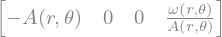

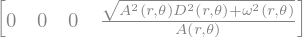

In [5]:
Vd = pt.ten('Vd',1)
Vd.assign(Vu("^a")*g("_a,_b"),"_b")
Vd.display('_')

Kd = pt.ten('Kd',1)
Kd.assign(Ku("^a")*g("_a,_b"),"_b")
Kd.simplify()
Kd.display('_')

Ld = pt.ten('Ld',1)
Ld.assign(Lu("^a")*g("_a,_b"),"_b")
Ld.simplify()
Ld.display('_')

Sd = pt.ten('Sd',1)
Sd.assign(Su("^a")*g("_a,_b"),"_b")
Sd.simplify()
Sd.display('_')

## Christoffel

In [6]:
Chr= pt.christoffel()

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

## COVARIANT DERIVATIVE OF $V_{\alpha}$

$$
V_{\alpha ; \beta}
$$


In [7]:
DcVd = pt.ten("DcVd",2)
DcVd_dat = pt.C(Vd("_a"),"_b") 
DcVd.assign(DcVd_dat,"_a,_b")
DcVd.factor()
#DcVd.display()
#DcVd.complete('_,_')

$$
a_{\alpha}=V^{\beta} V_{\alpha ; \beta}\,, \quad a_{\alpha;\beta}
$$

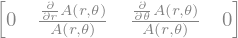

In [8]:
# Aceleracion y su derivada covariante
ad= pt.ten("ad",1)
ad.assign( DcVd("_a,_b")*Vu("^b") ,"_a")
ad.simplify()
ad.display('_')

Dcad = pt.ten("Dcad",2)
Dcad_dat = pt.C(ad("_a"),"_b") 
Dcad.assign(Dcad_dat,"_a,_b")
Dcad.simplify()
#Dcad.display()

$$
K_{\alpha ; \beta}\,, \quad L_{\alpha ; \beta} \,, \quad S{\alpha ; \beta}
$$

In [9]:
DcKd = pt.ten("DcKd",2)
DcKd_dat = pt.C(Kd("_a"),"_b") 
DcKd.assign(DcKd_dat,"_a,_b")
DcKd.simplify()
#DcKd.display()
#DcKd.complete('_,_')

DcLd = pt.ten("DcLd",2)
DcLd_dat = pt.C(Ld("_a"),"_b") 
DcLd.assign(DcLd_dat,"_a,_b")
DcLd.simplify()
#DcLd.display()
#DcLd.complete('_,_')

DcSd = pt.ten("DcSd",2)
DcSd_dat = pt.C(Sd("_a"),"_b") 
DcSd.assign(DcSd_dat,"_a,_b")
DcSd.factor()
#DcSd.display()
#DcSd.complete('_,_')

## Escalares Cinemáticos


$$
a_1= a_\mu K^\mu \,,\quad  a_2= a_\mu L^\mu \,, \quad  a_3= a_\mu S^\mu 
$$

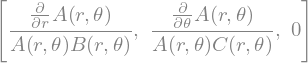

In [10]:
a1=pt.simplify(ad("_c")*Ku("^c"))
a2=pt.simplify(ad("_c")*Lu("^c"))
a3=pt.simplify(ad("_c")*Su("^c"))

# Derivadas 
Dca1 = pt.ten("Dca1",1)
Dca1_dat = pt.C(a1,"_a") 
Dca1.assign(Dca1_dat,"_a")
Dca1.factor()
#Dca1.complete('_,_')

Dca2 = pt.ten("Dca2",1)
Dca2_dat = pt.C(a2,"_a") 
Dca2.assign(Dca2_dat,"_a")
Dca2.factor()
#Dca2.complete('_,_')
[a1,a2,a3]

# Define the  directional derivatives operators
$$
f^{\dagger}=K^{\alpha} \partial_{\alpha} f \quad \text { and } \quad f^{*}=L^{\alpha} \partial_{\alpha} f
$$

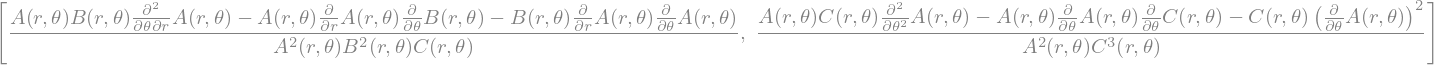

In [11]:
# Derivadas de los escalares 
Da1= pt.ten('Da1',1)
Da1.assign(pt.D(a1,"_a"), "_a")
Da1.simplify()
Da1dag= Ku('^a')*Da1('_a') 

Da2= pt.ten('Da2',1)
Da2.assign(pt.D(a2,"_a"), "_a")
Da2.simplify()
Da2dag= Ku('^a')*Da2('_a') 

Da1th= pt.ten('Da1th',1)
Da1th.assign(pt.D(a1,"_a"), "_a")
Da1th.simplify()
Da1theta= Lu('^a')*Da1th('_a') 

Da2th= pt.ten('Da2th',1)
Da2th.assign(pt.D(a2,"_a"), "_a")
Da2th.simplify()
Da2theta= Lu('^a')*Da2th('_a') 

[Da1theta,Da2theta ]

$$ 
j_1= L^\mu K_{\mu;\nu}  K^\nu \,, \quad j_2= L^\mu K_{\mu;\nu}  L^\nu \,,\quad j_3 = L^\mu K_{\mu;\nu}  S^\nu \,,\quad  j_4=S^\mu K_{\mu;\nu}  K^\nu \,, \quad j_5= S^\mu K_{\mu;\nu}  L^\nu \,,\quad j_6 = S^\mu K_{\mu;\nu}  S^\nu \,,\quad j_7= S^\mu L_{\mu;\nu}  K^\nu \,,\quad  j_8= S^\mu L_{\mu;\nu}  L^\nu \,, \quad  j_9 = S^\mu S_{\mu;\nu}  S^\nu 
$$

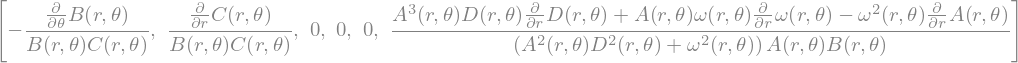

In [12]:
j1= pt.simplify(Lu("^c")*DcKd("_c,_d")*Ku("^d"))
j2= pt.simplify(Lu("^c")*DcKd("_c,_d")*Lu("^d"))
j3= pt.simplify(Lu("^c")*DcKd("_c,_d")*Su("^d"))
j4= pt.simplify(Su("^c")*DcKd("_c,_d")*Ku("^d"))
j5= pt.simplify(Su("^c")*DcKd("_c,_d")*Lu("^d"))
j6= pt.simplify(Su("^c")*DcKd("_c,_d")*Su("^d"))

j7= pt.simplify(Su("^c")*DcLd("_c,_d")*Ku("^d"))
j8= pt.simplify(Su("^c")*DcLd("_c,_d")*Lu("^d"))
j9= pt.simplify(Su("^c")*DcLd("_c,_d")*Su("^d"))

([j1,j2,j3,j4,j5,j6])

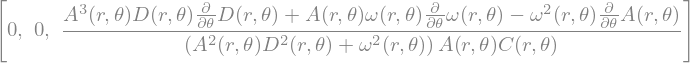

In [13]:
[j7,j8,j9]

In [14]:
# Derivas de las jotas
Dj1= pt.ten('Dj1',1)
Dj1.assign(pt.D(j1,"_a"), "_a")
Dj1.simplify()
Dj1dag= Ku('^a')*Dj1('_a') 

Dj2= pt.ten('Dj2',1)
Dj2.assign(pt.D(j2,"_a"), "_a")
Dj2.simplify()
Dj2dag= Ku('^a')*Dj2('_a') 

Dj6= pt.ten('Dj6',1)
Dj6.assign(pt.D(j6,"_a"), "_a")
Dj6.simplify()
Dj6dag= Ku('^a')*Dj6('_a') 

Dj9= pt.ten('Dj9',1)
Dj9.assign(pt.D(j9,"_a"), "_a")
Dj9.simplify()
Dj9dag= Ku('^a')*Dj9('_a')

Dj1th= pt.ten('Dj1th',1)
Dj1th.assign(pt.D(j1,"_a"), "_a")
Dj1th.simplify()
Dj1theta= Lu('^a')*Dj1th('_a') 

Dj2th= pt.ten('Dj2th',1)
Dj2th.assign(pt.D(j2,"_a"), "_a")
Dj2th.simplify()
Dj2theta= Lu('^a')*Dj2th('_a') 

Dj6th= pt.ten('Dj6th',1)
Dj6th.assign(pt.D(j6,"_a"), "_a")
Dj6th.simplify()
Dj6theta= Lu('^a')*Dj6th('_a')

Dj9th= pt.ten('Dj9th',1)
Dj9th.assign(pt.D(j9,"_a"), "_a")
Dj9th.simplify()
Dj9theta= Lu('^a')*Dj9th('_a')


$$
\Omega_{\alpha \beta}= \frac12\left( V_{\alpha;\beta}-V_{\beta;\alpha} + a_{\alpha}V_{\beta} - a_{\beta}V_{\alpha}\right)
$$

In [15]:
Omed = pt.ten("Omed",2)
Omed.assign((DcVd("_a,_b")-DcVd("_b,_a") + ad("_a")*Vd("_b")-ad("_b")*Vd("_a"))/2,"_a,_b")
Omed.factor()

$$
\Omega_1= K^{a}\Omega_{\alpha \beta}L^{\beta}\,,\quad \Omega_2= S^{a}\Omega_{\alpha \beta}K^{\beta}\,,\quad \Omega_3= S^{a}\Omega_{\alpha \beta}L^{\beta}\,,\quad \Omega=\frac{\Omega_2}{\Omega_3}
$$

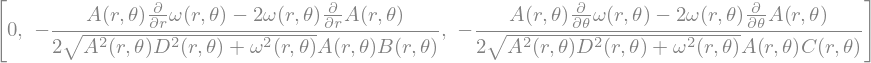

In [16]:
Omega1= pt.factor(Ku("^a")*Omed("_a,_b")*Lu("^b"))
Omega2= pt.factor(Ku("^a")*Omed("_a,_b")*Su("^b"))
Omega3= pt.factor(Lu("^a")*Omed("_a,_b")*Su("^b"))
Omega = pt.simplify(Omega2/Omega3)
[Omega1,Omega2,Omega3]

$$
\begin{aligned}
\Omega_{\alpha \beta} &=\Omega_{1}\left(K_{\alpha} L_{\beta}-K_{\beta} L_{\alpha}\right)+\Omega_{2}\left(K_{\alpha} S_{\beta}-K_{\beta} S_{\alpha}\right) +\Omega_{3}\left(L_{\alpha} S_{\beta}-L_{\beta} S_{\alpha}\right)
\end{aligned}
$$

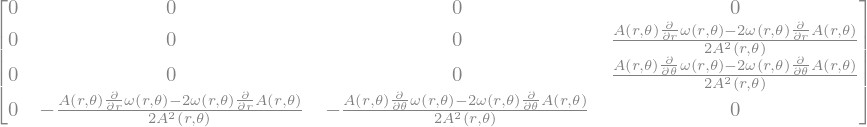

In [17]:
Omed = pt.ten("Omed",2)
Omed.assign(Omega1*(Kd("_a")*Ld("_b") - Kd("_b")*Ld("_a")) \
             + Omega2*(Sd("_a")*Kd("_b") - Sd("_b")*Kd("_a")) \
             + Omega3*(Sd("_a")*Ld("_b") - Sd("_b")*Ld("_a")),"_a,_b")
Omed.factor()
Omed.display()

In [18]:
# Derivadas de las omegas
DOme2= pt.ten('DOme2',1)
DOme2.assign(pt.D(Omega2,"_a"), "_a")
DOme2.simplify()
DOme2dag= Ku('^a')*DOme2('_a') 

DOme3= pt.ten('DOme3',1)
DOme3.assign(pt.D(Omega3,"_a"), "_a")
DOme3.simplify()
DOme3dag= Ku('^a')*DOme3('_a') 

DOme2th= pt.ten('DOme2th',1)
DOme2th.assign(pt.D(Omega2,"_a"), "_a")
DOme2th.simplify()
DOme2theta= Lu('^a')*DOme2th('_a')

DOme3th= pt.ten('DOme3th',1)
DOme3th.assign(pt.D(Omega3,"_a"), "_a")
DOme3th.simplify()
DOme3theta= Lu('^a')*DOme3th('_a')

## Verificando 
$$
\begin{aligned}
j_{1}^{\dagger}+j_{2}^{\theta} &=0 \qquad (73) \\
a_{1}^{\theta}-a_{2}^{\dagger} &=a_{1} j_{1}+a_{2} j_{2} \qquad (74)\\
j_{6}^{\theta}-j_{9}^{\dagger} &=j_{6} j_{1}+j_{9} j_{2} \qquad (75) \\
\Omega_{2}^{\theta}-\Omega_{3}^{\dagger}&=\left(a_{2}+j_{1}-j_{9}\right) \Omega_{2}+\left(j_{6}+j_{2}-a_{1}\right) \Omega_{3} \qquad (76)
\end{aligned}
$$

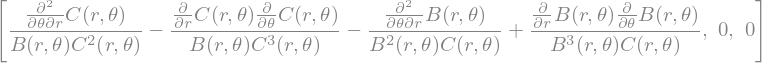

In [19]:
ec73= pt.simplify(Dj1dag + Dj2theta)
ec74= pt.simplify(Da1theta - Da2dag - a1*j1 - a2*j2)
ec75= pt.simplify(Dj6theta - Dj9dag - j6*j1 - j9*j2)
[ec73,ec74,ec75]

In [20]:
ec76= pt.simplify(DOme2theta - DOme3dag - (a2+j1-j9)*Omega2 - (j6+j2-a1)*Omega3  )
ec76

In [21]:
Ric = pt.ricci()
Ric.complete('_,_')

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

## Verificando
$$
a_{1}^{\dagger}+a_{2}^{\theta}+a_{1}\left(a_{1}+j_{2}+j_{6}\right)+a_{2}\left(a_{2}+j_{9}-j_{1}\right)+2\left(\Omega_{2}^{2}+\Omega_{3}^{2}\right)=0 \qquad (21) 
$$

In [22]:
ec21 = factor( Da1dag + Da2theta + a1*(a1+j2+j6) + a2*(a2+j9-j1) + 2*(Omega2**2 + Omega3**2) )
#ec21

$$
\Omega_{2}^{\dagger}+\Omega_{2}\left(2 a_{1}+j_{2}\right)+\Omega_{3}^{\theta}+\Omega_{3}\left(2 a_{2}-j_{1}\right)=0 \qquad (22) 
$$

In [23]:
ec22 = factor(DOme2dag + Omega2*(2*a1+j2) + DOme3theta + Omega3*(2*a2-j1))
#ec22

$$
j_{1}^{\theta}-\left(a_{1}+j_{2}+j_{6}\right)^{\dagger}+j_{1}\left(a_{2}+j_{9}-j_{1}\right)-a_{1}^{2}-j_{2}^{2}-j_{6}^{2}+2 \Omega_{2}^{2}=0 \qquad (23)
$$

In [24]:
ec23 = factor(Dj1theta - Da1dag - Dj2dag - Dj6dag + j1*(a2+j9-j1) - a1**2 - j2**2 -  j6**2 + 2*Omega2**2) 
#ec23

$$
\left(a_{1}+j_{6}\right)^{\theta}+a_{2}\left(a_{1}-j_{2}\right)+j_{9}\left(j_{6}-j_{2}\right)-2 \Omega_{2} \Omega_{3}=0 \qquad (24)
$$

In [25]:
ec24 = factor(Da1theta + Dj6theta + a2*(a1-j2) + j9*(j6-j2) - 2*Omega2*Omega3)
#ec24

$$
\left(a_{2}+j_{9}\right)^{\dagger}+a_{1}\left(a_{2}+j_{1}\right)+j_{1} j_{6}+j_{6} j_{9}-2 \Omega_{2} \Omega_{3}=0 \qquad (25)
$$

In [26]:
ec25 = factor(Da2dag + Dj9dag + a1*(a2+j1) +  j1*j6 +j6*j9 -2*Omega2*Omega3)
#ec25 

$$
j_{2}^{\dagger}+\left(a_{2}-j_{1}+j_{9}\right)^{\theta}+a_{1} j_{2}+j_{2} j_{6}+a_{2}^{2}+j_{1}^{2}+j_{2}^{2}+j_{9}^{2}-2 \Omega_{3}^{2}=0 \qquad (26)
$$

In [27]:
ec26 = factor(Dj2dag + Da2theta - Dj1theta + Dj9theta + a1*j2 + j2*j6 + a2**2 + j1**2 + j2**2 + j9**2 - 2*Omega3**2)
#ec26

$$
j_{6}^{\dagger}+j_{9}^{\theta}+j_{6}\left(a_{1}+j_{2}+j_{6}\right)+j_{9}\left(a_{2}-j_{1}+j_{9}\right)-2\left(\Omega_{2}^{2}+\Omega_{3}^{2}\right)=0 \qquad (27)
$$

In [28]:
ec27 = factor(Dj6dag + Dj9theta + j6*(a1+j2+j6) + j9*(a2-j1+j9)  -2*(Omega2**2 + Omega3**2))
#ec27

$$
(21)\qquad  V^a R_{ab} V^b \\
(22)\qquad  V^a R_{ab} S^b \\
(23)\qquad  K^a R_{ab} K^b \\
(24)\quad -K^a R_{ab} L^b \\
(25)\quad -L^a R_{ab} K^b \\
(26)\quad -L^a R_{ab} L^b \\
(27)\quad -S^a R_{ab} S^b
$$

In [29]:
ec21g=Vu("^a")*Ric("_a,_b")*Vu("^b")
ec22g=Vu("^a")*Ric("_a,_b")*Su("^b")
ec23g=Ku("^a")*Ric("_a,_b")*Ku("^b")
ec24g=-1*Ku("^a")*Ric("_a,_b")*Lu("^b")
ec25g=-1*Lu("^a")*Ric("_a,_b")*Ku("^b")
ec26g=-1*Lu("^a")*Ric("_a,_b")*Lu("^b")
ec27g=-1*Su("^a")*Ric("_a,_b")*Su("^b")

In [30]:
[pt.simplify(ec21g-ec21),pt.simplify(ec22g-ec22),pt.simplify(ec23g-ec23), pt.simplify(ec24g-ec24),\
    pt.simplify(ec25g-ec25),pt.simplify(ec26g-ec26), pt.simplify(ec27g-ec27) ]

In [31]:
ec28 = ec21.subs(sqrt(A**2*D**2 + omega**2), Phi)
ec28 = pt.factor(ec28)

ec28jus= pt.simplify((a1*C*sqrt(A**2*D**2+omega**2)).diff(r)) + pt.simplify((a2*B*sqrt(A**2*D**2+omega**2)).diff(theta)) + 2*B*C*sqrt(A**2*D**2+omega**2)*(Omega2**2+Omega3**2)
ec28jus2= ec28jus.subs(sqrt(A**2*D**2+omega**2), Phi)
ec28jus = pt.factor(ec28jus2/(B*C*Phi))

In [32]:
pt.simplify(ec28 - ec28jus)

In [33]:
ec29a = ec27.subs(sqrt(A**2*D**2 + omega**2), Phi)
ec29 = expand(ec29a)

ec29jus= pt.simplify((j6*C*sqrt(A**2*D**2+omega**2)).diff(r)) + pt.simplify((j9*B*sqrt(A**2*D**2+omega**2)).diff(theta)) - 2*B*C*sqrt(A**2*D**2+omega**2)*(Omega2**2+Omega3**2)
ec29jus2= ec29jus.subs(sqrt(A**2*D**2+omega**2), Phi)
ec29jus= expand(ec29jus2/(B*C*Phi))

In [34]:
cer=factor(ec29-ec29jus)
cer = cer.subs(A**2*D**2 + omega**2, Phi**2)
cer

In [35]:
ec30a = expand(-ec23+ec26)
ec30b = expand(ec30a-ec27)
ec30  = simplify(ec30b-ec21)/2

In [36]:
ec30jus = Dj2dag - Dj1theta - a2*j9 -a1*j6 + j2**2 + j1**2 - Omega2**2 - Omega3**2
ec30jus = ec30jus.subs(A**2*D**2 + omega**2, Phi**2)
ec30jus = factor(ec30jus)

In [37]:
cero = factor(ec30jus-ec30)
cero = cero.subs(A**2*D**2 + omega**2, Phi**2)
cero

In [38]:
cer= a1+j6 - 1/B*((sqrt(A**2*D**2+omega**2)).diff(r))/(sqrt(A**2*D**2+omega**2))
simplify(cer)

In [39]:
cer= a2+j9 - 1/C*((sqrt(A**2*D**2+omega**2)).diff(theta))/(sqrt(A**2*D**2+omega**2))
simplify(cer)

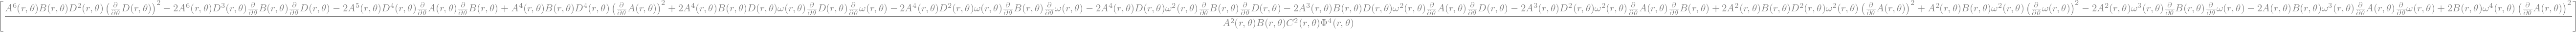

In [40]:
ter1= C*(a2*j9)
ter1= ter1.subs(A**2*D**2 + omega**2, Phi**2)
ter2= B*(a1*j6)
ter2= ter2.subs(A**2*D**2 + omega**2, Phi**2)
ter3 = factor(2*j1*(a2+j9)+ a2**2+j9**2)
ter3= ter3.subs(A**2*D**2 + omega**2, Phi**2)
[ter3]


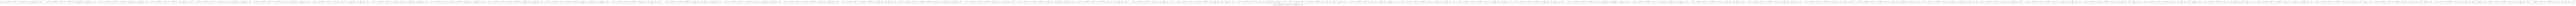

In [41]:
factor(factor(1/C**2*(ter1).diff(theta))-factor(1/B**2*(ter2).diff(r)) +ter3)